GAJJALA THRIDIVA REDDY

DOGS VS CATS CLASSIFICATION

### Import Necessary libraries

In [3]:
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt
import pickle

In [4]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:15<00:00, 112MB/s] 
100% 1.06G/1.06G [00:15<00:00, 75.3MB/s]


In [6]:
import zipfile
ref=zipfile.ZipFile("/content/dogs-vs-cats.zip")
ref.extractall('/content')
ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
data_dir = '/content/train'
dataset = image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.


In [9]:
validation_data_dir = '/content/test'
validation_dataset = image_dataset_from_directory(
    directory=validation_data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
  image=tf.cast(image/225,tf,float(32))
  return image,label

  train_dataset=train_ds.map(process)
  validation_dataset=validation_dataset.map(process)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [12]:
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
hist=model.fit(dataset,epochs=3,validation_data=validation_dataset)

Epoch 1/3
625/625 [==============================] - 3758s 6s/step - loss: 1.4655 - accuracy: 6.5000e-04 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 2/3
625/625 [==============================] - 3673s 6s/step - loss: 1.4047 - accuracy: 5.0000e-05 - val_loss: 0.6964 - val_accuracy: 0.0000e+00
Epoch 3/3
625/625 [==============================] - 3652s 6s/step - loss: 1.3964 - accuracy: 5.0000e-05 - val_loss: 0.6973 - val_accuracy: 0.0000e+00


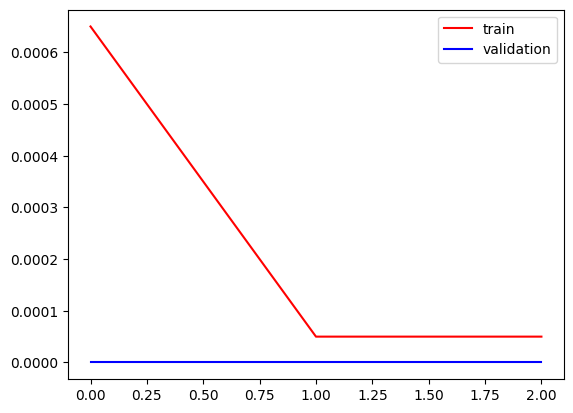

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

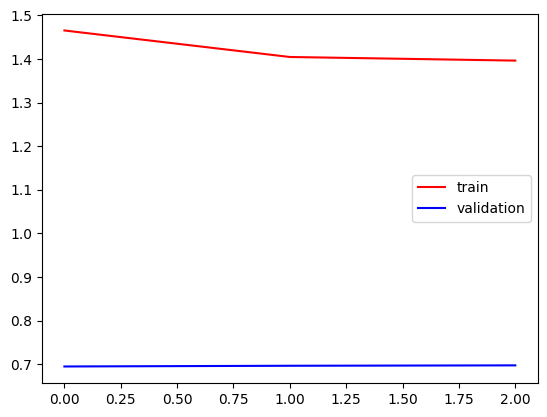

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
import cv2

In [28]:
test_image=cv2.imread('/content/cat.jpg')

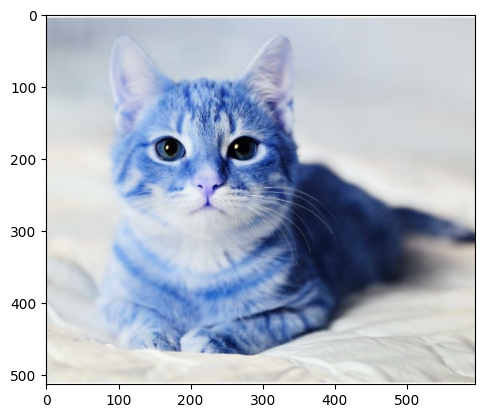

In [29]:
plt.imshow(test_image)

In [30]:
test_image.shape

(513, 595, 3)

In [31]:
test_image=cv2.resize(test_image,(256,256))

In [32]:
test_input=test_image.reshape(1,256,256,3)

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 202ms/step


array([[0.4677787 , 0.45316038, 0.4531017 , 0.45043194, 0.45154256,
        0.4535888 , 0.4505724 , 0.4528578 , 0.4535347 , 0.45203888,
        0.45137438, 0.453969  , 0.4511514 , 0.45035133, 0.45174563,
        0.45165676, 0.45206386, 0.45226982, 0.4667141 , 0.45367876,
        0.4543568 , 0.4515801 , 0.4522396 , 0.45234996, 0.47602028,
        0.45831248, 0.4510408 , 0.4521    , 0.45195627, 0.45301425,
        0.46381578, 0.49357435, 0.45082533, 0.4535493 , 0.45175466,
        0.45239207, 0.45185328, 0.4663213 , 0.45222527, 0.45318502,
        0.4518089 , 0.45353395, 0.45529288, 0.45294255, 0.45181856,
        0.4563619 , 0.46498355, 0.46583828, 0.45213515, 0.46842703,
        0.4511176 , 0.4550681 , 0.4538813 , 0.45373356, 0.45431384,
        0.45709997, 0.45142326, 0.45273626, 0.4563755 , 0.4550963 ,
        0.45065764, 0.4515973 , 0.4516749 , 0.45734936, 0.45213974,
        0.45418042, 0.4513413 , 0.45176548, 0.4559416 , 0.45274755,
        0.4519397 , 0.4562796 , 0.45812985, 0.45